## Data Visualization
Perform this step only after data cleaning

In [1]:
# For Analysis
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73320 entries, 0 to 73319
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                73320 non-null  int64  
 1   Position                  73320 non-null  int64  
 2   ActWeightIncr             73320 non-null  int64  
 3   HorseWeight               73320 non-null  int64  
 4   GatePosition              73320 non-null  float64
 5   WinningMargin             73320 non-null  float64
 6   WinOdds                   73320 non-null  float64
 7   Contenders                73320 non-null  int64  
 8   Distance                  73320 non-null  int64  
 9   PrizeMoney                73320 non-null  int64  
 10  Rating                    73320 non-null  int64  
 11  Gold                      73320 non-null  int64  
 12  Silver                    73320 non-null  int64  
 13  Bronze                    73320 non-null  int64  
 14  TotalM

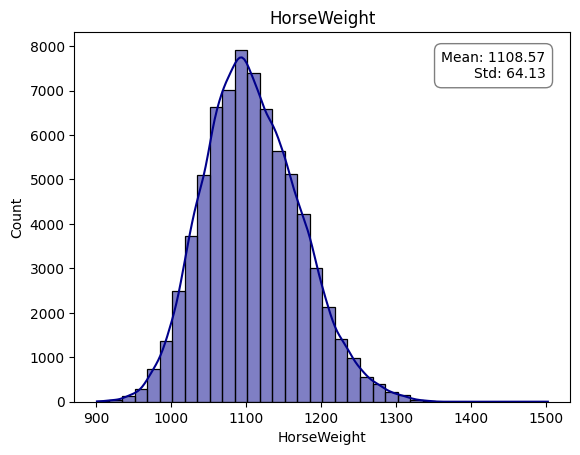

In [3]:
def show_plot(name) -> None:
    """
    Display a histogram for specified column with text of mean & std.

    Attributes:
        name (str): The name of the column in the dataframe to plot.
    """
    sns.histplot(df[name], kde=True,
                bins=int(180/5), color = 'darkblue')
    plt.title(name)
    mean_weight = df[name].mean()
    std_weight = df[name].std()

    # Add text annotations for mean and standard deviation
    plt.text(0.95, 0.95, f'Mean: {mean_weight:.2f}\nStd: {std_weight:.2f}',
            verticalalignment='top', horizontalalignment='right',
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
    plt.show()

show_plot('HorseWeight')

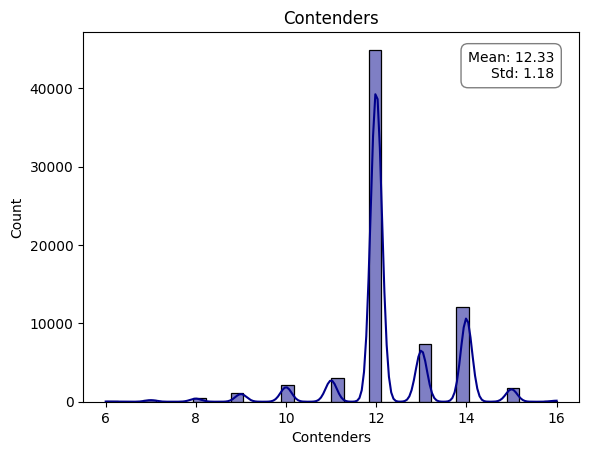

In [7]:
show_plot("Contenders")

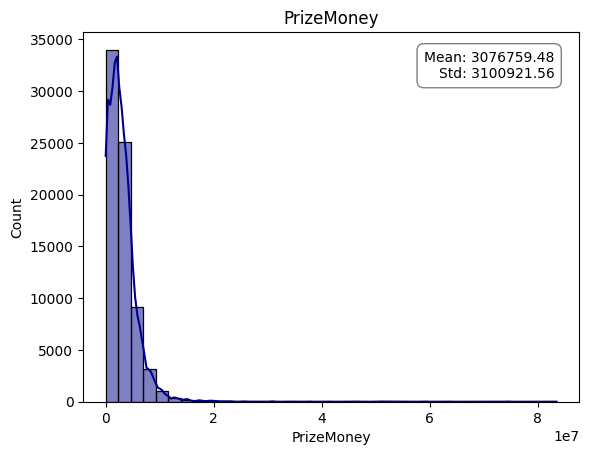

In [10]:
show_plot("PrizeMoney")

<Axes: >

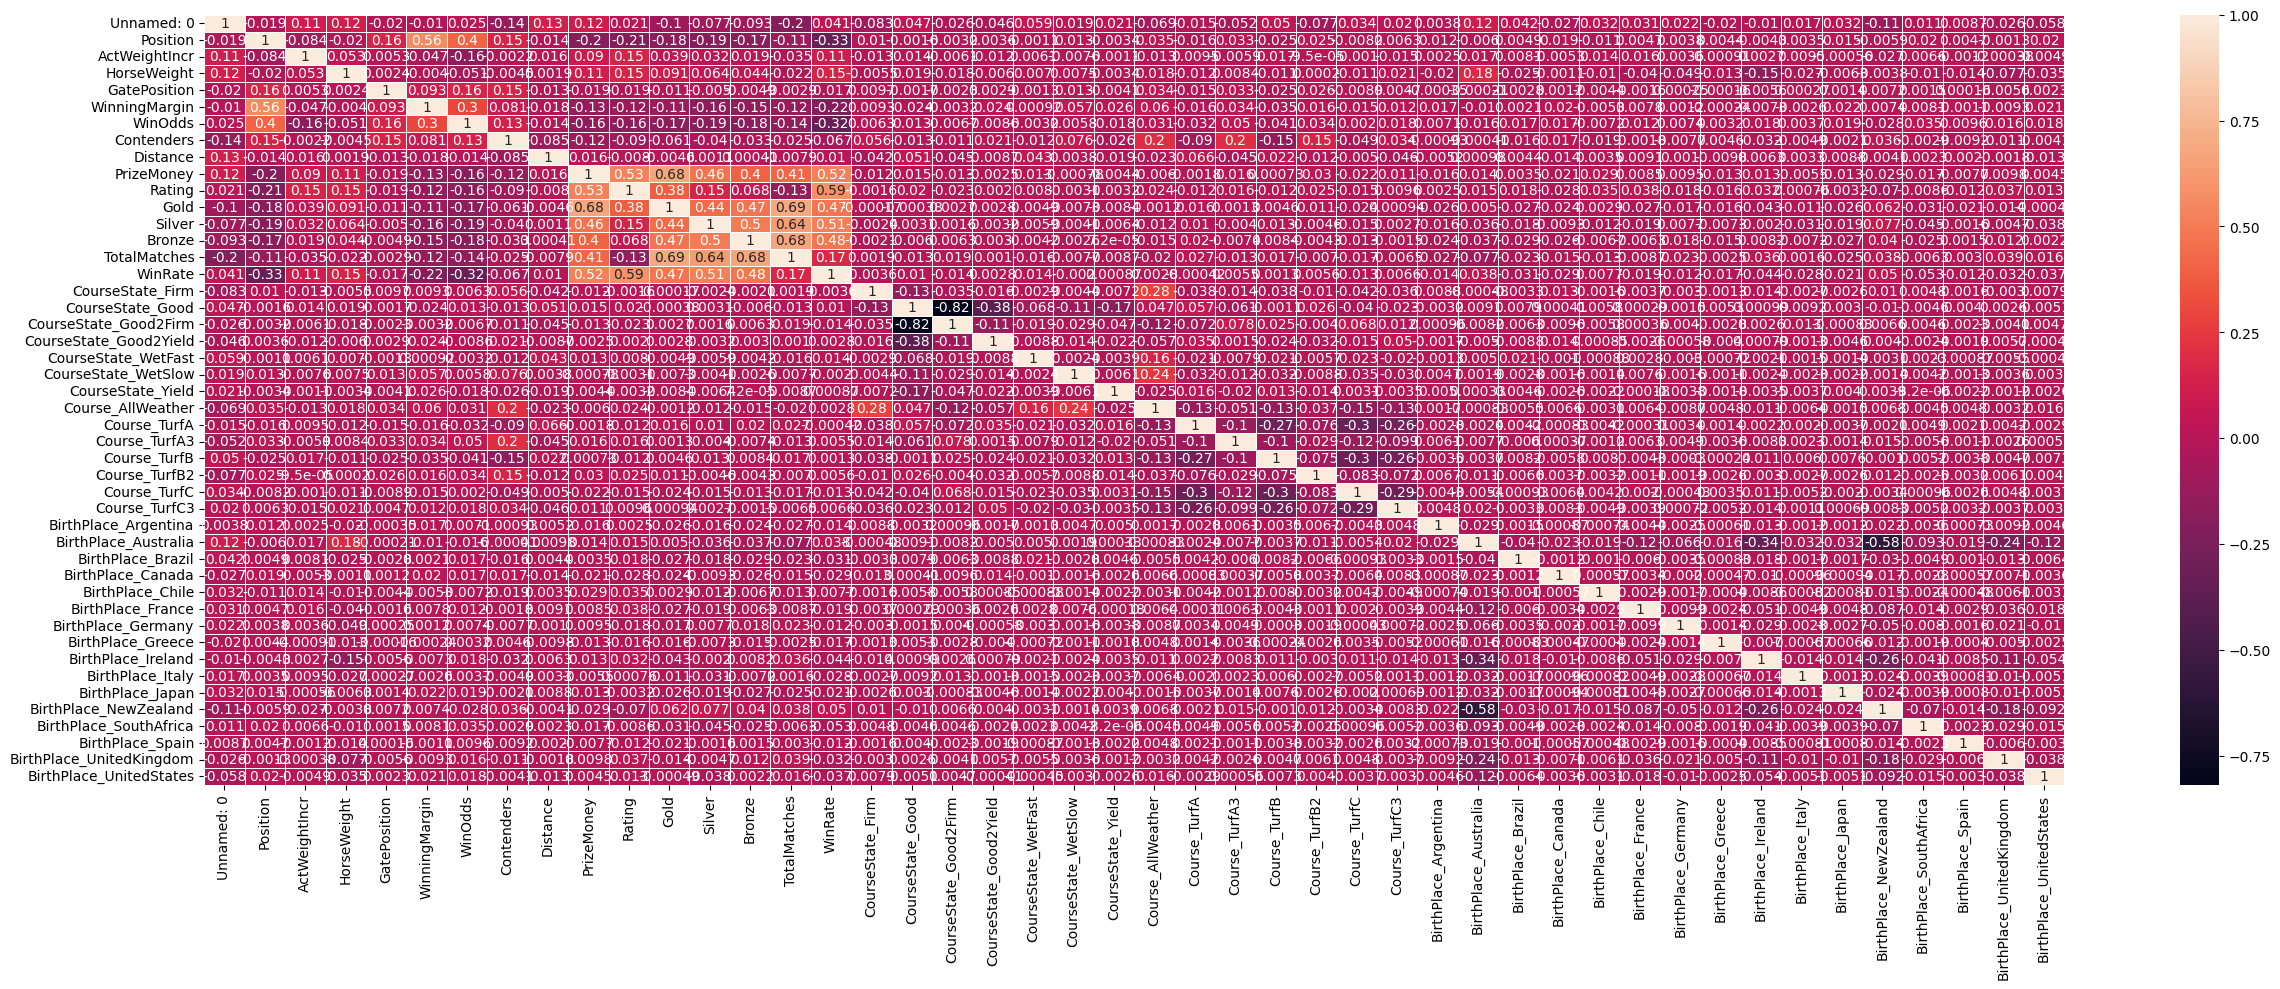

In [4]:
# plotting correlation of variables
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,)

C:\Users\Chan\AppData\Local\Temp\ipykernel_13556\720983498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.values, y=distribution.index, palette='viridis')


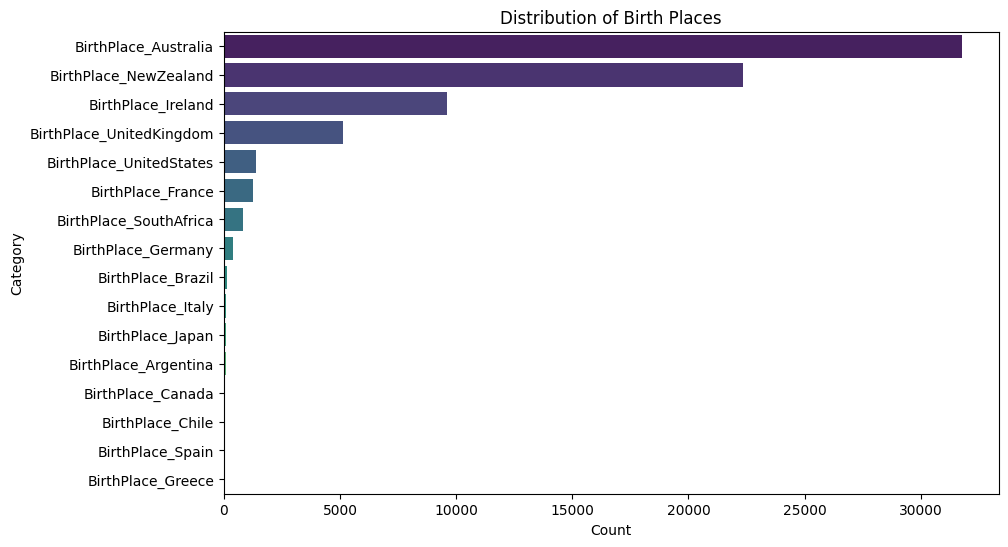

C:\Users\Chan\AppData\Local\Temp\ipykernel_13556\720983498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.values, y=distribution.index, palette='viridis')


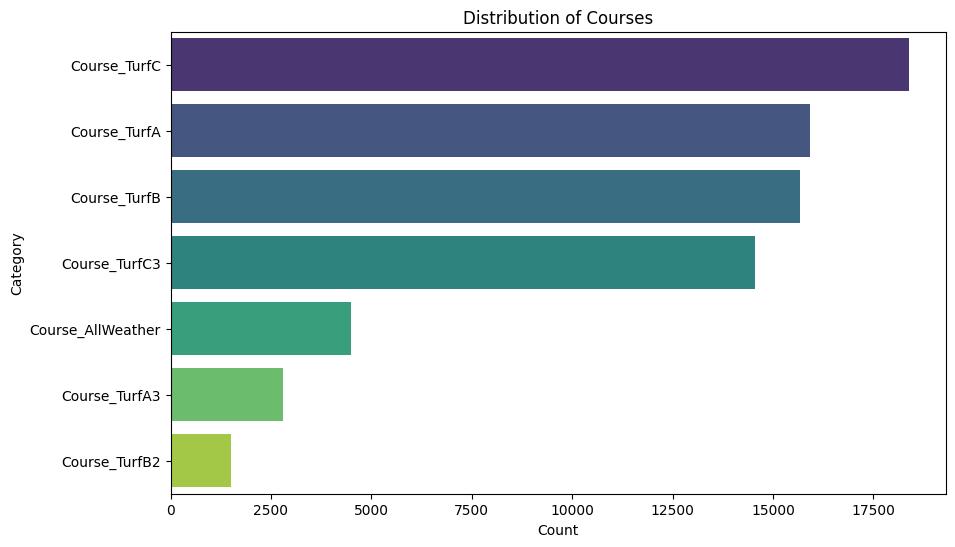

C:\Users\Chan\AppData\Local\Temp\ipykernel_13556\720983498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.values, y=distribution.index, palette='viridis')


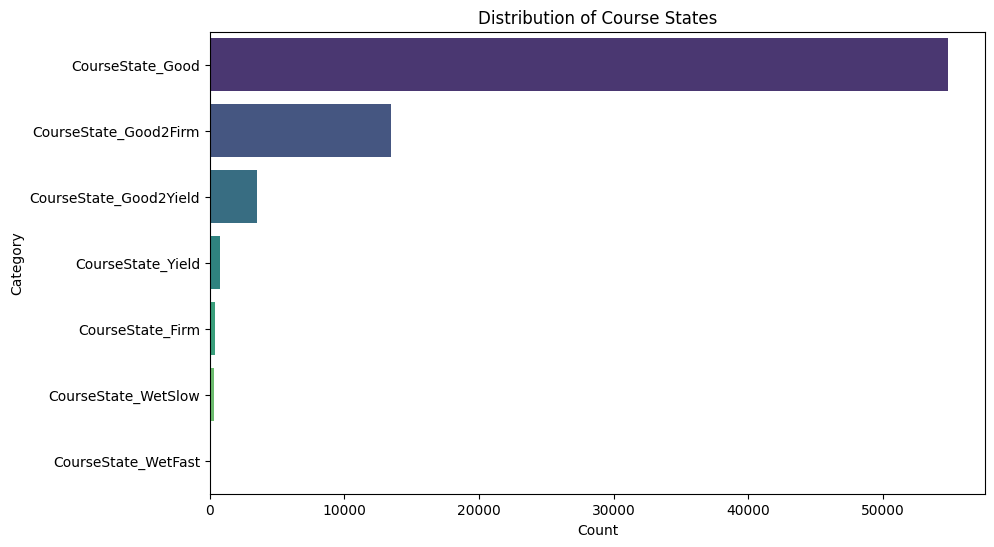

In [13]:
def plot_distribution(df, prefix, title) -> None:
    """
    Plot the distribution of one-hot encoded columns with a given prefix.

    Attributes:
        df (pd.DataFrame): The dataframe containing one-hot encoded columns.
        prefix (str): The prefix of the one-hot encoded columns to plot.
        title (str): The title for the plot.
    """
    columns = [col for col in df.columns if col.startswith(prefix)]
    
    distribution = df[columns].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=distribution.values, y=distribution.index, palette='viridis')
    
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Category')
    
    plt.show()

# Example usage
plot_distribution(df, 'BirthPlace_', 'Distribution of Birth Places')
plot_distribution(df, 'Course_', 'Distribution of Courses')
plot_distribution(df, 'CourseState_', 'Distribution of Course States')